In [1]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# data visualization
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# Convert to Dataframe

irisDF = pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target





In [3]:

from sklearn import mixture
# gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')
gmm = mixture.GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)
# saving cluster results as a column in DF
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)


target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [4]:
print(gmm_cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Map each cluster to a class by picking the most common class for each cluster (using the scipy.stats.mode() function)?

In [5]:
from scipy import stats
# stats.mode(gmm_cluster_labels)
stats.mode(irisDF[irisDF['gmm_cluster'] == 0]['target'])

ModeResult(mode=array([0]), count=array([50]))

In [6]:

stats.mode(irisDF[irisDF['gmm_cluster'] == 1]['target'])

ModeResult(mode=array([1]), count=array([45]))

In [7]:

stats.mode(irisDF[irisDF['gmm_cluster'] == 2]['target'], axis=None)

ModeResult(mode=array([2]), count=array([50]))

In [8]:

irisDF[irisDF['gmm_cluster'] == 2]['target']

68     1
70     1
72     1
77     1
83     1
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
111    2
112    2
113    2
114    2
115    2
116    2
117    2
118    2
119    2
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int64

In [9]:
irisDF.shape

(150, 6)

In [10]:
irisDF[(irisDF['gmm_cluster'] != 0) & (irisDF['gmm_cluster'] != 1) & (irisDF['gmm_cluster'] != 2)]


,sepal_length,sepal_width,petal_length,petal_width,target,gmm_cluster


In [11]:
# dfnp = pd.DataFrame(iris_result).to_numpy()

In [12]:
# from scipy import stats
# stats.mode(dfnp)

In [13]:
y_pred=irisDF['gmm_cluster']
y=irisDF['target'];

In [14]:


np.sum(y_pred==y)  / len(y_pred) 

0.9666666666666667

In [15]:
print(irisDF['target'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [16]:
print(irisDF['gmm_cluster'])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: gmm_cluster, Length: 150, dtype: int64


In [18]:
from sklearn.datasets import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=2000, centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]), cluster_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1]))

In [19]:
print(X_blobs)

[[-1.61974506  2.04521289]
 [-1.95980696  2.18731607]
 [ 0.09235082  2.45102407]
 ...
 [-2.91373226  1.25386546]
 [-1.86166716  2.15567014]
 [-2.84566084  2.70017103]]


In [20]:
print(y_blobs)

[1 1 0 ... 4 1 3]


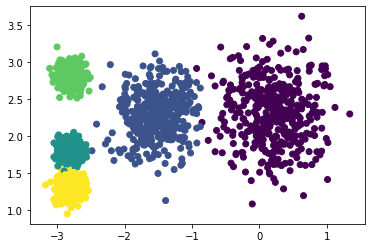

In [21]:

a = plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)

In [22]:
from sklearn.cluster import KMeans

In [24]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(X_blobs)
y_blobs_pred = Cluster.predict(X_blobs)

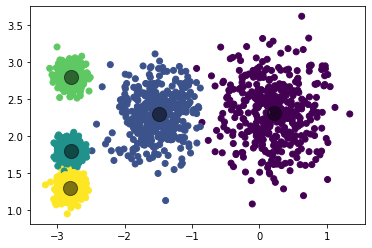

In [25]:
# This code does not work. Gives too many centroids
# m=X_blobs.shape[0]
# n=X_blobs.shape[1]
# centres=np.array([]).reshape(n,0)  
a = plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
centres=Cluster.cluster_centers_
plt.scatter(centres[:,0],centres[:,1],c='black',s=200,alpha=0.5)

PRINT THE VALUES OF CENTROIDS

In [26]:
centres

array([[-1.48323007,  2.29874781],
       [-2.80038921,  2.79423342],
       [-2.80193082,  1.30305057],
       [ 0.2184202 ,  2.3163578 ],
       [-2.79025412,  1.79938543]])

In [33]:
# for k in range(K):
#    plt.scatter(final[k+1][:,0],final[k+1][:,1])
# plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
# plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
# plt.show()

In [27]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [28]:

y_new_pred = Cluster.predict(X_new)

In [29]:
print(y_new_pred)

[3 3 1 1]


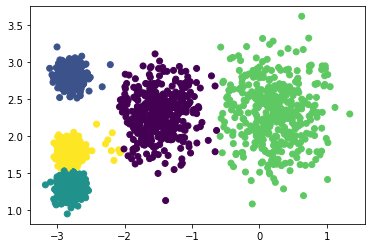

In [30]:
a = plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_pred)

Plot model’s decision boundaries using data, centroids,decision boundaries. Result should be a voronoi_plot

In [31]:
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d
vor=Voronoi(centres)


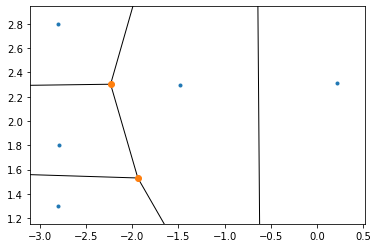

In [32]:
fig=voronoi_plot_2d(vor)
plt.show()

Text(0.5, 1.0, 'Original Dataset')

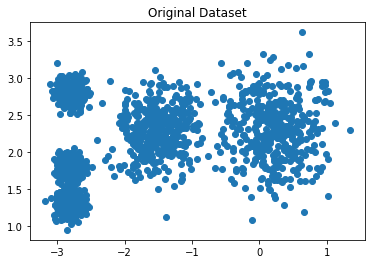

In [37]:
plt.scatter(X_blobs[:,0],X_blobs[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


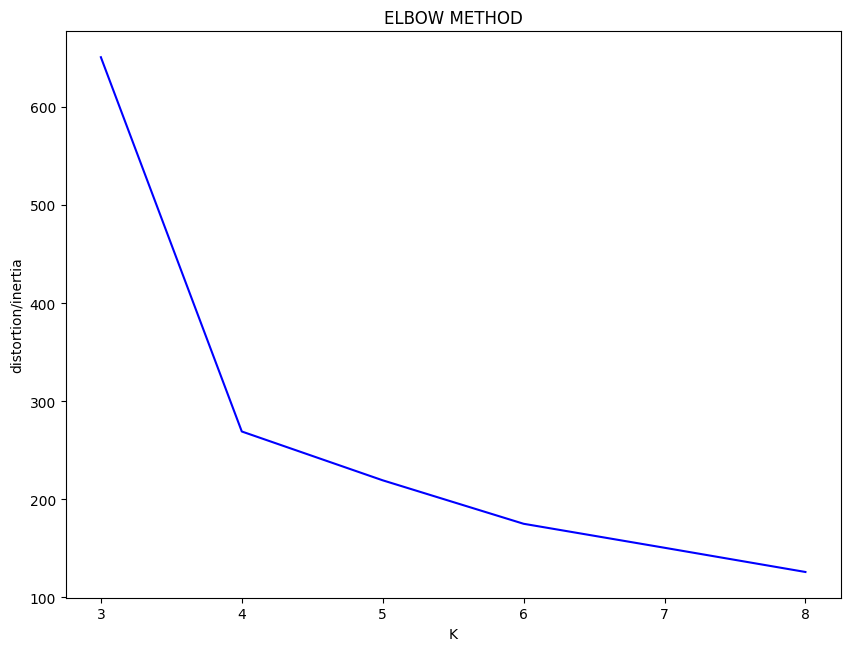

In [44]:
import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(3, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X_blobs)
    elbow.append(kmeans.inertia_)
p=sns.lineplot(range(3, 9), elbow,color='blue')

p.set_xlabel("K")
p.set_ylabel("distortion/inertia")
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()

In [ ]:
# VALUE OF K AT ELBOW IS 4